In [1]:
import numpy as np
from keras.datasets import mnist

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
from keras.models import Model
from keras.layers import Dense, Input

In [7]:
input_img = Input(shape=(784, ))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [8]:
autoencoder = Model(input_img, decoded)

In [9]:
autoencoder.compile(optimizer='adadelta',
                   loss = 'binary_crossentropy')

In [10]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)              

In [11]:
autoencoder.fit(X_train, X_train,
               batch_size=256,
               epochs=50,
               shuffle=True,
               validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6922 - val_loss: 0.6921
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6919 - val_loss: 0.6918
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6916 - val_loss: 0.691

In [12]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(32, ))
decoder_layers = autoencoder.layers[4:]

In [13]:
print(autoencoder.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000011968226C50>, <tensorflow.python.keras.layers.core.Dense object at 0x000001196822A3C8>, <tensorflow.python.keras.layers.core.Dense object at 0x000001196822A4A8>, <tensorflow.python.keras.layers.core.Dense object at 0x000001196822A748>, <tensorflow.python.keras.layers.core.Dense object at 0x000001196822AB00>, <tensorflow.python.keras.layers.core.Dense object at 0x0000011902D59208>, <tensorflow.python.keras.layers.core.Dense object at 0x0000011902D59EB8>]


In [14]:
decoder = Model(encoded_input, decoder_layers[0](encoded_input))

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

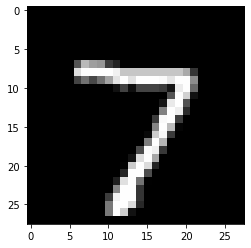

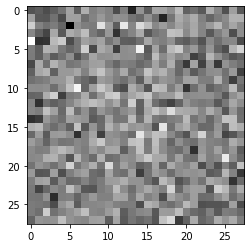

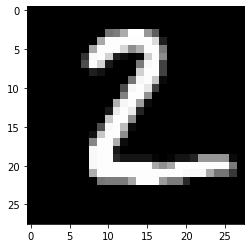

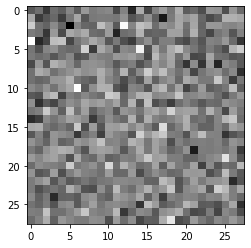

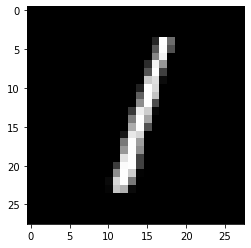

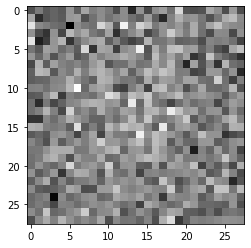

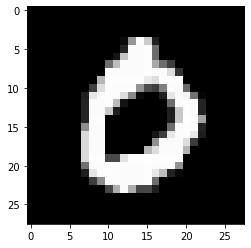

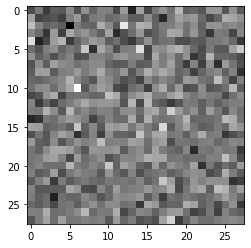

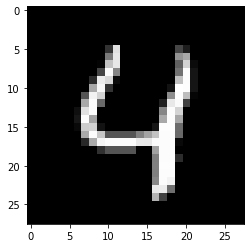

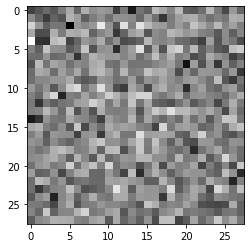

In [16]:
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.show()
    
    out = autoencoder.predict(X_test[i].reshape(1, -1))
    
    plt.imshow(out[0].reshape(28, 28), cmap='gray')
    plt.show()